In [2]:
pip install -r requirements.txt

In [104]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import datasets, linear_model
from sklearn.metrics import classification_report,confusion_matrix,roc_curve,auc
from sklearn.preprocessing import StandardScaler

In [4]:
# Load the saved datasets from the CSV files
X_train = pd.read_csv("../data/X_train.csv", index_col=0)  # Use the first column as index
y_train = pd.read_csv("../data/y_train.csv", index_col=0)  # Use the first column as index
X_test = pd.read_csv("../data/X_test.csv", index_col=0)    # Use the first column as index
y_test = pd.read_csv("../data/y_test.csv", index_col=0)    # Use the first column as index

# Display the first few rows of the loaded datasets
(X_train.head(), y_train.head(), X_test.head(), y_test.head())

(   age         workclass  fnlwgt  education  education-num  \
 0   39         State-gov   77516  Bachelors             13   
 1   50  Self-emp-not-inc   83311  Bachelors             13   
 2   38           Private  215646    HS-grad              9   
 3   53           Private  234721       11th              7   
 4   28           Private  338409  Bachelors             13   
 
        marital-status         occupation   relationship   race     sex  \
 0       Never-married       Adm-clerical  Not-in-family  White    Male   
 1  Married-civ-spouse    Exec-managerial        Husband  White    Male   
 2            Divorced  Handlers-cleaners  Not-in-family  White    Male   
 3  Married-civ-spouse  Handlers-cleaners        Husband  Black    Male   
 4  Married-civ-spouse     Prof-specialty           Wife  Black  Female   
 
    capital-gain  capital-loss  hours-per-week native-country  
 0          2174             0              40  United-States  
 1             0             0          

In [5]:
# For running linear regression we need all of the features to be numbers, but currently we have:
(X_train.dtypes,X_test.dtypes)

(age                int64
 workclass         object
 fnlwgt             int64
 education         object
 education-num      int64
 marital-status    object
 occupation        object
 relationship      object
 race              object
 sex               object
 capital-gain       int64
 capital-loss       int64
 hours-per-week     int64
 native-country    object
 dtype: object,
 age                int64
 workclass         object
 fnlwgt             int64
 education         object
 education-num      int64
 marital-status    object
 occupation        object
 relationship      object
 race              object
 sex               object
 capital-gain       int64
 capital-loss       int64
 hours-per-week     int64
 native-country    object
 dtype: object)

In [6]:
# We thus want to factorize the object variables. To do this to both the test and the train data whilst ensuring the same key is used
# for both, we briefly concatinate the dataframes before splitting them back up
X_all = pd.concat({'X_train':X_train, 'X_test':X_test})

# Then we factorize
objects = ['workclass','education','marital-status','occupation','relationship','race','sex','native-country']
keys = [0]*len(objects)

for i in range(len(objects)):
    X_all[objects[i]], keys[i] = pd.factorize(X_all[objects[i]])

# Then we return the original test train split
X_train = X_all.loc['X_train']
X_test = X_all.loc['X_test']

(X_train.dtypes,X_test.dtypes)

(age               int64
 workclass         int64
 fnlwgt            int64
 education         int64
 education-num     int64
 marital-status    int64
 occupation        int64
 relationship      int64
 race              int64
 sex               int64
 capital-gain      int64
 capital-loss      int64
 hours-per-week    int64
 native-country    int64
 dtype: object,
 age               int64
 workclass         int64
 fnlwgt            int64
 education         int64
 education-num     int64
 marital-status    int64
 occupation        int64
 relationship      int64
 race              int64
 sex               int64
 capital-gain      int64
 capital-loss      int64
 hours-per-week    int64
 native-country    int64
 dtype: object)

In [7]:
# We thus want to factorize the object variables. To do this to both the test and the train data whilst ensuring the same key is used
# for both, we briefly concatinate the dataframes before splitting them back up
y_all = pd.concat({'y_train':y_train, 'y_test':y_test})

# Then we factorize
y_all['income'], income_key = pd.factorize(y_all['income'])

# Then we return the original test train split
y_train = y_all.loc['y_train']
y_test = y_all.loc['y_test']

(y_train.dtypes,y_test.dtypes)

(income    int64
 dtype: object,
 income    int64
 dtype: object)

In [95]:
# Create linear regression object
lr = linear_model.LogisticRegression(max_iter=1000)

# Train the model using the training sets
lr.fit(X_train,y_train.values.ravel())

# Make predictions using the testing set
y_pred = lr.predict(X_test)

print(lr.score(X_train,y_train))
print(lr.score(X_test,y_test))

Coefficients: 
 [[ 7.50662500e-03  8.68613603e-02 -2.44022431e-06 -4.87676688e-02
   1.67645280e-02 -1.31441768e-01 -8.35957039e-02 -4.65467488e-01
  -8.14768283e-02 -2.44861810e-01  3.29749771e-04  7.02902314e-04
  -1.94193091e-03 -1.77246967e-02]]
Mean squared error: 0.21
Coefficient of determination: -0.14
0.798335596118067
0.7900308778120865


C:\Users\Sheri\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [109]:
pipe = make_pipeline(StandardScaler(), LogisticRegression())

pipe.fit(X_train, y_train.values.ravel())  # apply scaling on training data
y_pred2 = pipe.predict(X_test)

print(pipe.score(X_train, y_train))
print(pipe.score(X_test, y_test))

0.8258912857645698
0.8201367445963829


In [92]:
import sklearn.metrics as metrics
def regression_results(y_true, y_pred):

    # Regression metrics
    explained_variance=metrics.explained_variance_score(y_true, y_pred)
    mean_absolute_error=metrics.mean_absolute_error(y_true, y_pred) 
    mse=metrics.mean_squared_error(y_true, y_pred) 
    mean_squared_log_error=metrics.mean_squared_log_error(y_true, y_pred)
    median_absolute_error=metrics.median_absolute_error(y_true, y_pred)
    r2=metrics.r2_score(y_true, y_pred)

    print('explained_variance: ', round(explained_variance,4))    
    print('mean_squared_log_error: ', round(mean_squared_log_error,4))
    print('r2: ', round(r2,4))
    print('MAE: ', round(mean_absolute_error,4))
    print('MSE: ', round(mse,4))
    print('RMSE: ', round(np.sqrt(mse),4))

In [93]:
# https://stackoverflow.com/questions/26319259/how-to-get-a-regression-summary-in-scikit-learn-like-r-does
regression_results(y_test,y_pred)

explained_variance:  0.0036
mean_squared_log_error:  0.0975
r2:  -0.1028
MAE:  0.203
MSE:  0.203
RMSE:  0.4506


In [86]:
model = sm.Logit(y_train, X_train)
results = model.fit()
print(results.summary())

Optimization terminated successfully.
         Current function value: 0.448115
         Iterations 8
                           Logit Regression Results                           
Dep. Variable:                 income   No. Observations:                39774
Model:                          Logit   Df Residuals:                    39760
Method:                           MLE   Df Model:                           13
Date:                Fri, 18 Oct 2024   Pseudo R-squ.:                  0.1841
Time:                        17:33:15   Log-Likelihood:                -17823.
converged:                       True   LL-Null:                       -21844.
Covariance Type:            nonrobust   LLR p-value:                     0.000
                     coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------
age                0.0015      0.001      1.535      0.125      -0.000       0.003
workclass        

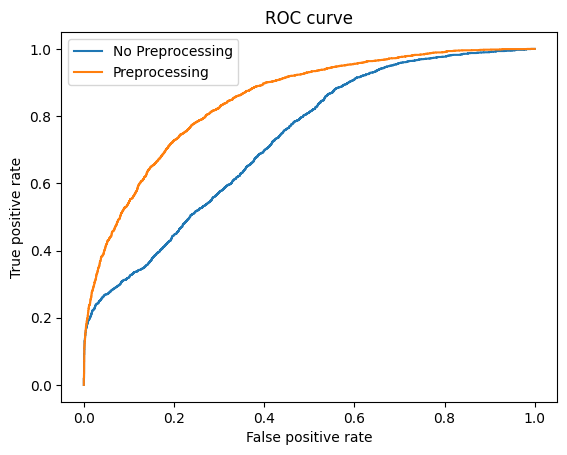

In [112]:
# https://www.kaggle.com/code/shubhamlipare/logistic-regression-with-auc-roc-curve
y_predprob=lr.predict_proba(X_test)
y_predprob2=pipe.predict_proba(X_test)
fpr,tpr,threshold = roc_curve(y_test,y_predprob[:,1])
fpr2,tpr2,threshold = roc_curve(y_test,y_predprob2[:,1])
plt.plot(fpr,tpr)
plt.plot(fpr2,tpr2)
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve')
plt.legend(['No Preprocessing','Preprocessing'])

In [113]:
print(auc(fpr,tpr))
print(auc(fpr2,tpr2))

0.7291075807930096
0.8480098063282541
